# **Telecom_Churn_Classification_Project**

In [148]:
import pandas as pd # pandas is used to read csv file, data cleaning, table operations
import numpy as np # numerical operatioons

In [149]:
from sklearn.model_selection import train_test_split
# to train data and split the final test data
# matalb, data ko train(model sikhega) aur test (final check) me split karna

In [150]:
from sklearn.preprocessing import StandardScaler
# StandardScaler -> to standardize data
# matalb, features ko scale karta hai (jaise, mean 0, std 1)

from sklearn.pipeline import Pipeline
# pipline is used to packing the scaler and model together makes the workflow clean, organized, and less prone to mistakes.
# matalb, scaler+model ko ek saath pack, cleaner & mistake-free workflow me help karta hai

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression is used to create a best baseline model for classification
# matlab, Logistic Regression baseline classification model banane ke liye accha hota hai.
# RandomForestClassifier is a powerful tree-based model that can capture complex non-linear patterns in the data.
# RandomForestClassifier powerful tree model, non-linear patterns catch karta hai

In [152]:
from sklearn.metrics import(
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)
# classification_report shows precision, recall, and F1-score
# matlab, classification_report -> precision/recall,f1 dikhata hai

# confusion_matrix provides TP/FP/FN/TN breakdown
# confusion_matrix -> TP/FP/FN/TN breakdown

# roc-auc_score measures overall ranking performance
# roc_auc_score -> overall ranking performance dekhta hai

# precision-recall curve with AUC (PR-AUC) is a strong metric for imbalanced data
# precision_revall_curve+ auc -> imbalanced data me strong metric(PR-AUC)

**Load Dataset.**

In [153]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Telecom_Churn Classification Project/telecom_churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [154]:
print(df.shape)
# df.shape() is used to helps us understand how many rows (records) and columns (features) are there in the dataset.
# df.shape() se pata chalta hai dataset me kitni rows (records) aur kitne columns (features) hain.

df.head()
# df.head() is used to display the first few rows of the dataset so we can quickly understand the data structure.
# df.head() dataset ki first 5 rows dikhata hai, jisse hume data ka structure aur values ka idea mil jata hai.

(3333, 11)


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [155]:
# Target/Features Split
x = df.drop(columns = ["Churn"])
# x -> input features

y = df["Churn"]
# -> target(jo predict karna hai)

In [156]:
# Class Imbalance Check
# very imporatant step because if the data is imbalanced,
# the model can predict “all 0” and still get around ~85% accuracy
# That’s why we focus on ROC-AUC, PR-AUC, and Recall instead of just accuracy.

print(y.value_counts())
print(y.value_counts(normalize = True))


Churn
0    2850
1     483
Name: count, dtype: int64
Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64


In [157]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

# test_size =0.2 = 80%train, 20%test
# random_state=42 -> same result repeatable
# stratify_y -> ensures the churn ratio remains the same in both train and test sets, which is important for imbalanced data.
# stratify_y -> train/test me churn ration same rahe (imbalance me zarurai!)

In [158]:
# Model_1 -> Logistic Regression(Baseline)

# Pipline(Scaling+Model)

lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter =2000,
        class_weight = "balanced",
        random_state = 42
    ))
])

lr_pipe.fit(x_train, y_train)

# Why? we use pipline
# because, it combines preprocessing and modeling into a single workflow.
# and its ensures that scaling happens before model training and prevents data leakage
# matlab, preprocessing aur modeling ko ek saath jod dete hai,
# usse pehle scaling hoga, phir model train hoga (khud se(automatically))
# StandardScaler() -> Scaling for LR (scaling karta hai LR ki)
# class_weight -> gives extra importance to the minority (churn) class to handle class imbalance. (churn class(minority) ko extra imporatance)
# max_iter=2000 -> used for convergence (convergence ke liye)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    random_state=42))])

In [159]:
# Predict + Evaluate

lr_pred = lr_pipe.predict(x_test)
lr_proba = lr_pipe.predict_proba(x_test)[:,1]

lr_auc = roc_auc_score(y_test, lr_proba)

prec, rec, _ = precision_recall_curve(y_test, lr_proba)
lr_prauc = auc(rec, prec)

print("ROC-AUC:", lr_auc)
print("PR-AUC:", lr_prauc)
print(classification_report(y_test, lr_pred))


ROC-AUC: 0.8094953879544221
PR-AUC: 0.4082051387177146
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.35      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



In [160]:
# Model_2: RandomForest

# Train RF

rf = RandomForestClassifier(
    n_estimators = 400, # more trees -> stable performance
    random_state = 42,
    class_weight = "balanced_subsample", # Each tree tries to maintain class balance while learning from the data. (har tree me balance try)
    n_jobs = -1  # all CPU use (fast) -> (Sab CPU cores use karta hai, isliye training fast ho jaati hai.)
)

rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=400,
                       n_jobs=-1, random_state=42)

In [161]:
rf_pred = rf.predict(x_test)
rf_proba = rf.predict_proba(x_test)[:, 1]

rf_auc = roc_auc_score(y_test, rf_proba)
prec2, rec2, _ = precision_recall_curve(y_test, rf_proba)
rf_prauc = auc(rec2, prec2)

print("ROC-AUC:", rf_auc)
print("PR-AUC:", rf_prauc)
print(classification_report(y_test, rf_pred))

ROC-AUC: 0.8577681316693797
PR-AUC: 0.7278733988130746
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       570
           1       0.85      0.62      0.71        97

    accuracy                           0.93       667
   macro avg       0.89      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667



* Logistic Regression : precision low, recall high
* RandomForest : precision high, recall moderate, F1 much better

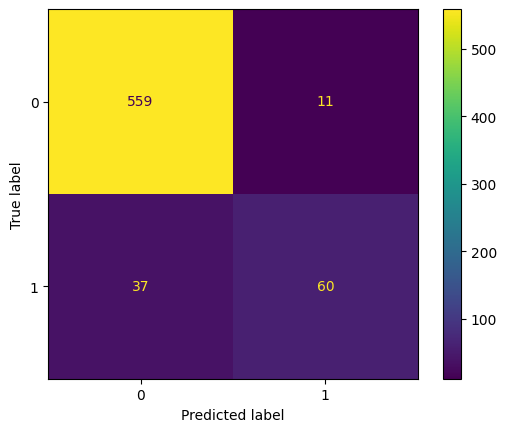

In [162]:
# Confusion Matrix(Clear breakdown)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.show()

# It's shows how many churn cases were correctly predicted by the model (TP)
# How many churn cases were missed (FN); in churn problems,
# FN is dangerous because actual churn are not identified.
# kitna churn ko correctly predictkiya (TP)
# kitne miss hue (FN) -> churn case me FN dangerous hota hai

* The dataset is imbalanced, so PR-AUC is an important metric.
* Dataset imbalanced hai, isliye PR_AUC important

* Random Forest performed better than Logistic Regression on this dataset.
* RandomForest data pe Logistic Regression se better nikla

In [163]:
# Feature Important
import pandas as pd

importances = rf.feature_importances_
# rf.feature -> Random Forest shows which features contribute the most to the decision-making process
# rf.feature -> RandomForest batata hai kaunse feature decision making me sabse zyada contribute kar rahe hai

feature_importance = pd.Series(importances, index=x_train.columns)
# pd.Series -> is used to map the importance values with their corresponding feature names.
# Pd.Series -> importance values ko feature ke saath map karte hai

feature_importance_sorted = feature_importance.sort_values(ascending=False)
# sort_values() -> is used so that the most important features appear at the top.
# sort_values() -> taaki sabse important feature upar aajaayein
feature_importance_sorted.head(10)

,0
DayMins,0.182517
CustServCalls,0.180063
MonthlyCharge,0.158181
ContractRenewal,0.102814
OverageFee,0.088024
RoamMins,0.071113
DataUsage,0.066114
AccountWeeks,0.062496
DayCalls,0.061293
DataPlan,0.027385


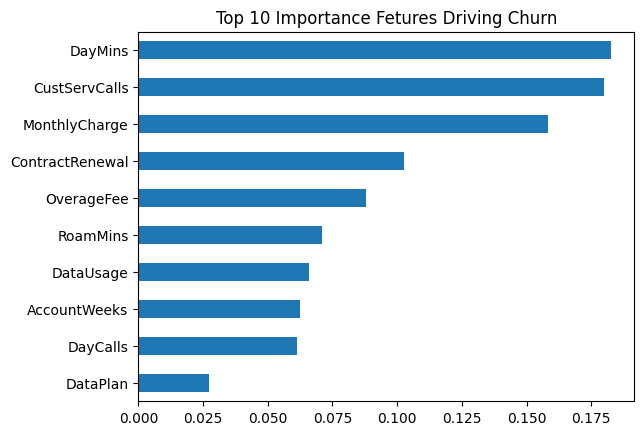

In [164]:
# Visualization
import matplotlib.pyplot as plt

feature_importance_sorted.head(10).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 10 Importance Fetures Driving Churn")
plt.show()

# This visualization helps interpret which variables influence churn the most, and making model more explainable.
# bar-chart visually dikhata hai kaunse feautures churn ko sabse zyada affect karte hai.
# Recruiter ko visual insight pasand aata hai.

RandomForest identified key churn drivers including high daytime usage, frequent customer service interactions, higher monthly charges, and contract non-renewal.

These insights suggest that churn prevention strategies should focus on:
* Early intervention for high-usage customers
* Improving customer service resolution
* Pricing optimization
* Contract retention campaigns

In [165]:
# XGBoost
from xgboost import XGBClassifier

In [166]:
xgb = XGBClassifier(
    n_estimators = 400,
    learning_rate = 0.05,
    max_depth = 3,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
    random_state = 42,
    eval_metric= "logloss"
)
xgb.fit(x_train, y_train)

# scale_pos_weight ->  adjusts for class imbalance. (imbalance handle karta hai)
# learning_rate -> controls boosting step size (step size control karta hai)
# max_depth -> controls tree complexity (tree complexity control karta hai)
# subsample -> reduces overfitting (overfitting reduce karta hai)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [167]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

xgb_proba = xgb.predict_proba(x_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_proba)

prec, rec, _ = precision_recall_curve(y_test, xgb_proba)
xgb_prauc = auc(rec, prec)

print("XGBosst ROC-AUC:", xgb_auc)
print("XGBoost PR-AUC:", xgb_prauc)

XGBosst ROC-AUC: 0.8489238560318322
XGBoost PR-AUC: 0.7295496433206651


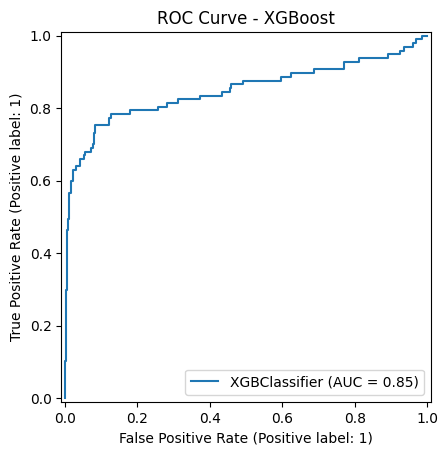

In [168]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(xgb, x_test, y_test)
plt.title("ROC Curve - XGBoost")
plt.show()

In [169]:
# Threshold Tuning:

custom_threshold = 0.35
y_custom = (xgb_proba > custom_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_custom))

# Lowering the threshold increases recall. (Recall badhta hai)
# Detecting more churn. (aur jade churn detect hote hai)
# But may increase false positives. (Lekin false positive bhi badh sakte hai)
# This trade-off must align with business priorities. (ye business decision hota hai)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       570
           1       0.50      0.78      0.61        97

    accuracy                           0.85       667
   macro avg       0.73      0.83      0.76       667
weighted avg       0.89      0.85      0.87       667



In [170]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC-AUC": [lr_auc, rf_auc, xgb_auc],
    "PR-AUC": [lr_prauc, rf_prauc, xgb_prauc]
})
comparison

# This table compares model performance using ROC-AUC and PR-AUC.
# Since the dataset is imbalanced, PR-AUC is particularly important for evaluation.

# DataFrame bana ke 3 models ka side-by-side comparison karte hain.
# ROC-AUC aur PR-AUC dono show karte hain.
# PR-AUC important hai kyunki dataset imbalanced tha.


,Model,ROC-AUC,PR-AUC
0,Logistic Regression,0.809495,0.408205
1,Random Forest,0.857768,0.727873
2,XGBoost,0.848924,0.729550


# **Business Insights**
**1. High Day Minutes**
* Day minutes usage is the strongest predictor of churn.
* Customer with higher daytime usage show increased churn likelihood, possibly due to higher billing impact.

**2. Customer Service Calls**
* Frequent customer service calls strongly correlate with churn.
* Indicating dissatisfaction or unresolved service issues.

**3. Monthly Charges**
* Higher monthly charges increase churn probability,
* Suggesting price sensitivity among customers.

**4. Contract Renewal**
* Contract renewal status significantly influences churn,
* With non-renewed contracts showing higher churn rates.

**5. Overage Fee**
* Customer incurring high overage fees are more likely to churn due to billing dissatisfaction

# **Final Model Selection**

* XGBoost was selected as the final model due to its superior ROC-AUC and PR-AUC performance compared to Logistic Regression and Random Forest.
* It effectively captured non-linear feature interactions and handled class imbalance using scale_pos_weight.
* Additionally, threshold tuning was applied to optimize recall for churn detection, aligning model performance with business retention strategy.

# **Final Conclusion**

* XGBoost was selected as the final model with ROC-AUC of ~0.85 and PR-AUC of ~0.73.
* Threshold tuning at 0.35 improved churn recall to 78%, enabling proactive identification of high-risk customers.
* Key churn drivers include high daytime usage, frequent customer service interactions, and higher monthly charges.
* The model balances predictive accuracy with business retention objectives.

# **Limitations**

* The model was trained on a static historical dataset; performance may vary if customer behavior changes over time.
* Feature importance is based on tree-based impurity measures; advanced interpretability methods such as SHAP were not implemented.
* Threshold tuning improved recall but increased false positives, which may impact operational costs.
* Hyperparameter tuning was limited and could be further optimized.

# **Future Improvements**

* Apply Stratified K-Fold Cross Validation for improved robustness.
* Perform advanced hyperparameter tuning using RandomizedSearchCV.
* Implement SHAP values for deeper interpretability.
* Deploy the model using Streamlit for real-time churn prediction.
* Incorporate cost-sensitive threshold optimization based on business impact.

# **Overall Summary:**

* This project developed a churn prediction system using Logistic Regression, Random Forest, and XGBoost.
* XGBoost achieved ROC-AUC ~0.85 and PR-AUC ~0.73.
* Threshold tuning improved churn recall to 78%.
* Key churn drivers include high daytime usage, frequent service calls, and higher monthly charges.
* This project demonstrates a complete ML pipeline from imbalance handling to business-aligned optimization for churn prediction.

In [171]:
import joblib
joblib.dump(xgb, "churn_model.pkl")

['churn_model.pkl']